<a href="https://colab.research.google.com/github/ilovesylus/computer/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：台北市 YouBike 即時數據分析報告

## 摘要

本報告根據台北市政府公開提供的 YouBike 即時資料，探討各站點的可借車輛數、可還車輛數與站點容量的關係，並分析不同行政區內的使用狀況差異。透過資料視覺化與統計分析，期望提供共享單車資源調度與使用效率上的實用建議。

## 引言

### 背景
共享單車已成為台北市重要的交通工具之一，然而如何掌握各站點即時的使用狀況，對於管理單位的車輛調度與市民的借還便利性皆至關重要。透過對 YouBike 即時數據的分析，可協助了解各行政區資源配置是否均衡。

### 目的
本研究旨在分析台北市各 YouBike 站點的車輛分布情形，針對「可借車輛」、「可還車位」與「站點容量」進行探索性數據分析，進一步比較各行政區的資源情形。
### 待答問題
1. 台北市各站點可借與可還車輛數分布狀況如何？

2. 各行政區的平均使用情形是否存在差異？

3. 哪些站點呈現高需求或資源失衡的情形？

## 方法

### 數據來源
資料來自台北市政府交通局公開資料平台：
🔗 YouBike 即時資訊 JSON

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入即時 JSON 並轉為 Pandas DataFrame。

2. 篩選重點欄位：站點名稱、行政區、總車位數、可借車輛、可還車輛、經緯度。

3. 新增欄位分析站點使用率，例如：使用率 = 可借 / 總車位。

4. 使用圖表呈現資料關係與趨勢：

In [10]:
import pandas as pd
import requests

url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

print(df.head())

         sno                     sna sarea                 mday  \
0  500101001      YouBike2.0_捷運科技大樓站   大安區  2025-06-15 17:51:02   
1  500101002  YouBike2.0_復興南路二段273號前   大安區  2025-06-15 17:50:04   
2  500101003    YouBike2.0_國北教大實小東側門   大安區  2025-06-15 17:48:03   
3  500101004       YouBike2.0_和平公園東側   大安區  2025-06-15 17:48:03   
4  500101005    YouBike2.0_辛亥復興路口西北側   大安區  2025-06-15 17:51:02   

              ar     sareaen  \
0    復興南路二段235號前  Daan Dist.   
1   復興南路二段273號西側  Daan Dist.   
2    和平東路二段96巷7號  Daan Dist.   
3  和平東路二段118巷33號  Daan Dist.   
4     復興南路二段368號  Daan Dist.   

                                               snaen  \
0               YouBike2.0_MRT Technology Bldg. Sta.   
1           YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.   
2  YouBike2.0_NTUE Experiment Elementary School (...   
3                      YouBike2.0_Heping Park (East)   
4  YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...   

                                    aren act        srcUpdateTime  

In [21]:
print(df.columns)

Index(['sno', 'sna', 'sarea', 'mday', 'ar', 'sareaen', 'snaen', 'aren', 'act',
       'srcUpdateTime', 'updateTime', 'infoTime', 'infoDate', 'total',
       'available_rent_bikes', 'latitude', 'longitude',
       'available_return_bikes'],
      dtype='object')


## 結果與分析

### 經緯度與可借車輛的空間分布關係
我們使用散點圖來觀察經緯度與可借車輛的空間分布關係

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32239 (\N{CJK UNIFIED IDEOGRAPH-7DEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31449 (\N{CJK UNIFIED IDEOGRAPH-7AD9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32147 (\N{CJK UNIFIED IDEOGRAPH-7D93}) missing from font(s) DejaVu Sans.
  fig.canvas

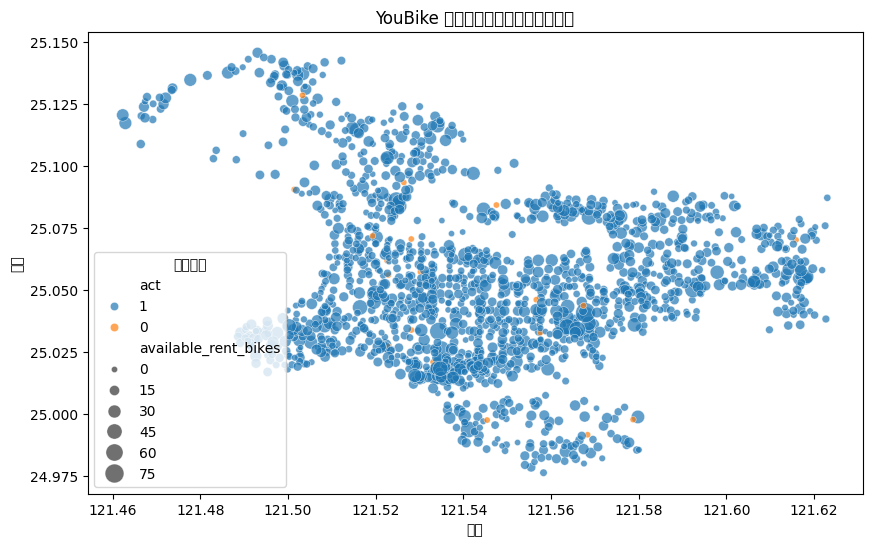

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    size='available_rent_bikes',
    sizes=(20, 200),
    hue='act',
    alpha=0.7
)
plt.title('YouBike 各站經緯度與可借車輛數分布')
plt.xlabel('經度')
plt.ylabel('緯度')
plt.legend(title='啟用狀態')
plt.show()


**分析結果**：從圖中可看出，市中心區域（如信義、中正、大安等）聚集較多站點，且部分站點的可借車輛量明顯較高，顯示出較強的通勤與使用熱區。

### 各行政區的總可借車輛量
使用長條圖呈現。

<ipython-input-26-1729592049>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_rent_stats.index, y=area_rent_stats.values, palette='coolwarm')
<ipython-input-26-1729592049>:9: UserWarning: Glyph 20839 (\N{CJK UNIFIED IDEOGRAPH-5167}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-1729592049>:9: UserWarning: Glyph 28246 (\N{CJK UNIFIED IDEOGRAPH-6E56}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-1729592049>:9: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-1729592049>:9: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-1729592049>:9: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) Dej

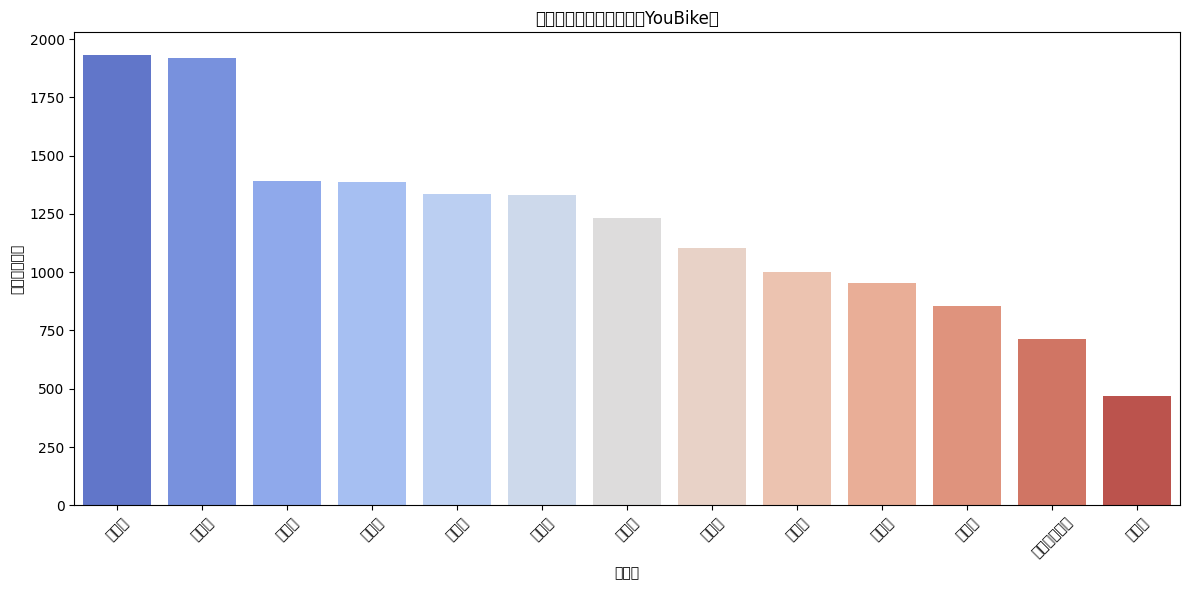

In [26]:
area_rent_stats = df.groupby('sarea')['available_rent_bikes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=area_rent_stats.index, y=area_rent_stats.values, palette='coolwarm')
plt.title('各行政區可借車輛總數（YouBike）')
plt.xlabel('行政區')
plt.ylabel('可借車輛總數')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**分析結果**：可看出大安區、中正區、信義區為可借車輛總數前三名，顯示該區域站點密集且使用需求高；部分區域（如文山、士林）則可借車量偏低，可能與人口密度或交通模式有關。

### 行政區間可借車輛數分布（箱型圖）
使用盒狀圖進行分析。

<ipython-input-25-927048346>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sarea', y='available_rent_bikes', palette='Set3')
<ipython-input-25-927048346>:10: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-927048346>:10: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-927048346>:10: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-927048346>:10: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-927048346>:10: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from font(s) DejaVu Sans.


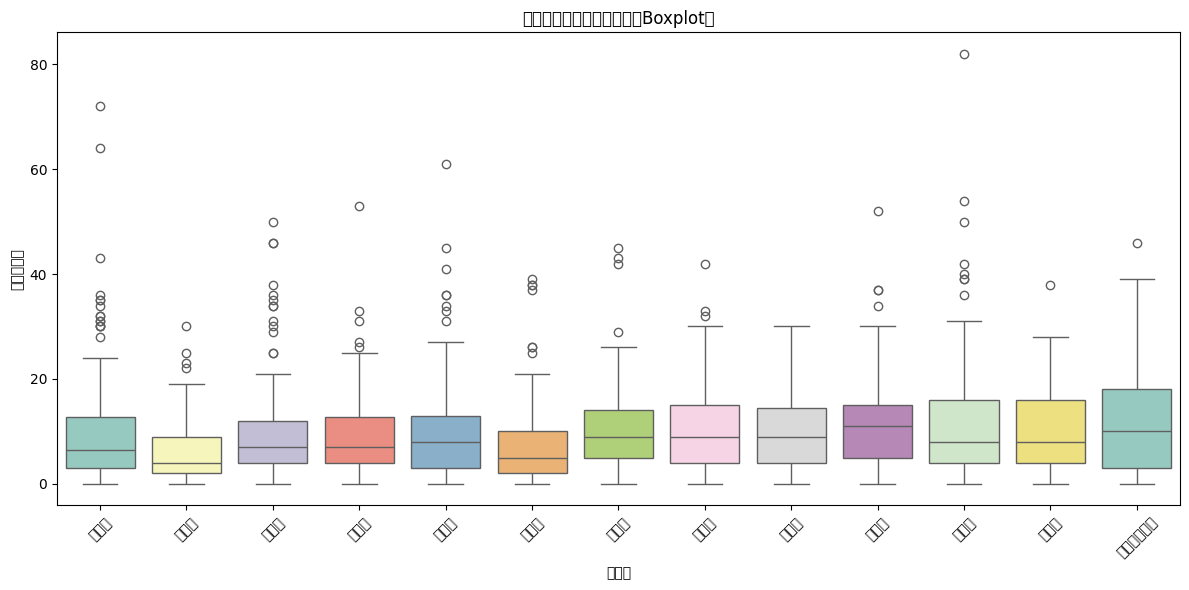

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sarea', y='available_rent_bikes', palette='Set3')
plt.title('各行政區可借車輛數分布（Boxplot）')
plt.xlabel('行政區')
plt.ylabel('可借車輛數')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**分析結果**：
大部分行政區的中位數落在 10~15 台車左右，但有些行政區（如信義、大安）出現了明顯的極端高需求站點（長鬚條），代表需特別關注這些「壓力點」以提升資源調度效率。

## 結論與建議


### 結論
1. 各站可借車輛與地理位置存在明顯聚集區（市中心熱區）。

2. 行政區之間存在顯著的車輛資源分布差異。

3. 某些站點顯示出極端高需求或低供給情形，需進一步調查使用行為。
### 建議
1. 加強高需求站點車輛調度，特別是信義、大安區交通節點。

2. 調整低使用率站點配置，考慮站點重置或宣傳提升使用率。

3. 未來可納入時間因素（時段分析）與天氣資料進行多維分析，預測尖峰需求，提升共享效率。


